# Data C102 Final Project

In [99]:
# data analysis and modeling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
import re

# plotting and helper libs
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

%matplotlib inline

plt.style.use('fivethirtyeight')
warnings.filterwarnings('ignore')

# 1. Data Overview

## FiveThirtyEight Data

In [8]:
dem = pd.read_csv('dem_candidates.csv')
rep = pd.read_csv('rep_candidates.csv')

In [9]:
display(rep.info())
dem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Candidate             1599 non-null   object
 1   Gender                1599 non-null   object
 2   Race 1                1599 non-null   object
 3   Race 2                30 non-null     object
 4   Race 3                1 non-null      object
 5   Incumbent             1599 non-null   object
 6   Incumbent Challenger  1599 non-null   object
 7   State                 1599 non-null   object
 8   Primary Date          1599 non-null   object
 9   Office                1599 non-null   object
 10  District              1214 non-null   object
 11  Primary Votes         1592 non-null   object
 12  Primary %             1592 non-null   object
 13  Primary Outcome       1599 non-null   object
 14  Runoff Votes          39 non-null     object
 15  Runoff %              39 non-null     

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1077 entries, 0 to 1076
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Candidate             1077 non-null   object
 1   Gender                1077 non-null   object
 2   Race 1                1077 non-null   object
 3   Race 2                30 non-null     object
 4   Race 3                1 non-null      object
 5   Incumbent             1077 non-null   object
 6   Incumbent Challenger  1077 non-null   object
 7   State                 1077 non-null   object
 8   Primary Date          1077 non-null   object
 9   Office                1077 non-null   object
 10  District              852 non-null    object
 11  Primary Votes         1076 non-null   object
 12  Primary %             1076 non-null   object
 13  Primary Outcome       1077 non-null   object
 14  Runoff Votes          24 non-null     object
 15  Runoff %              24 non-null     

Here we see that there are 1,599 Republican candidates and 1,077 Democratic candidates. Below are summaries of the counts and percents of incumbents.

In [10]:
print('Republicans:')
display(rep['Incumbent'].value_counts())
display(rep['Incumbent'].value_counts() / len(rep))

print('Democrats:')
display(dem['Incumbent'].value_counts())
display(dem['Incumbent'].value_counts() / len(dem))

Republicans:


,count
Incumbent,
No,1383
Yes,216


,count
Incumbent,
No,0.864916
Yes,0.135084


Democrats:


,count
Incumbent,
No,862
Yes,215


,count
Incumbent,
No,0.800371
Yes,0.199629


In [11]:
dem['Gender'].value_counts() / len(dem)

,count
Gender,
Male,0.647168
Female,0.351903
Nonbinary,0.000929


# 2. Exploratory Data Analysis (EDA)

## Democrats results

In [13]:
warnings.filterwarnings('ignore')

d_endorsers = dem[["Primary Outcome", "EMILY's List", "Justice Dems", "Indivisible",
                  "PCCC", "Our Revolution", "Sunrise", "Sanders", "AOC", "Party Committee"]]
d_endorsers["Primary Outcome"] = d_endorsers["Primary Outcome"].apply(lambda x: 1 if x == "Won" else 0)
d_endorsers["EMILY's List"] = d_endorsers["EMILY's List"].apply(lambda x: 1 if x == "Yes" else 0)
d_endorsers["Justice Dems"] = d_endorsers["Justice Dems"].apply(lambda x: 1 if x == "Yes" else 0)
d_endorsers["Indivisible"] = d_endorsers["Indivisible"].apply(lambda x: 1 if x == "Yes" else 0)
d_endorsers["PCCC"] = d_endorsers["PCCC"].apply(lambda x: 1 if x == "Yes" else 0)
d_endorsers["Our Revolution"] = d_endorsers["Our Revolution"].apply(lambda x: 1 if x == "Yes" else 0)
d_endorsers["Sunrise"] = d_endorsers["Sunrise"].apply(lambda x: 1 if x == "Yes" else 0)
d_endorsers["Sanders"] = d_endorsers["Sanders"].apply(lambda x: 1 if x == "Yes" else 0)
d_endorsers["AOC"] = d_endorsers["AOC"].apply(lambda x: 1 if x == "Yes" else 0)
d_endorsers["Party Committee"] = d_endorsers["Party Committee"].apply(lambda x: 1 if x == "Yes" else 0)

d_endorsers

,Primary Outcome,EMILY's List,Justice Dems,Indivisible,PCCC,Our Revolution,Sunrise,Sanders,AOC,Party Committee
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1072,0,0,0,0,0,0,0,0,0,0
1073,0,0,0,0,0,0,0,0,0,0
1074,0,1,0,0,0,0,0,0,0,0
1075,1,0,0,0,0,0,0,0,0,1


In [14]:
dem_endorsement_columns = ["EMILY's List", "Justice Dems", "Indivisible", "PCCC", "Our Revolution",
                       "Sunrise", "Sanders", "AOC", "Party Committee"]

dem_endorsement_counts = d_endorsers.sum()
dem_endorsement_counts

,0
Primary Outcome,459
EMILY's List,64
Justice Dems,15
Indivisible,21
PCCC,26
Our Revolution,27
Sunrise,14
Sanders,19
AOC,9
Party Committee,31


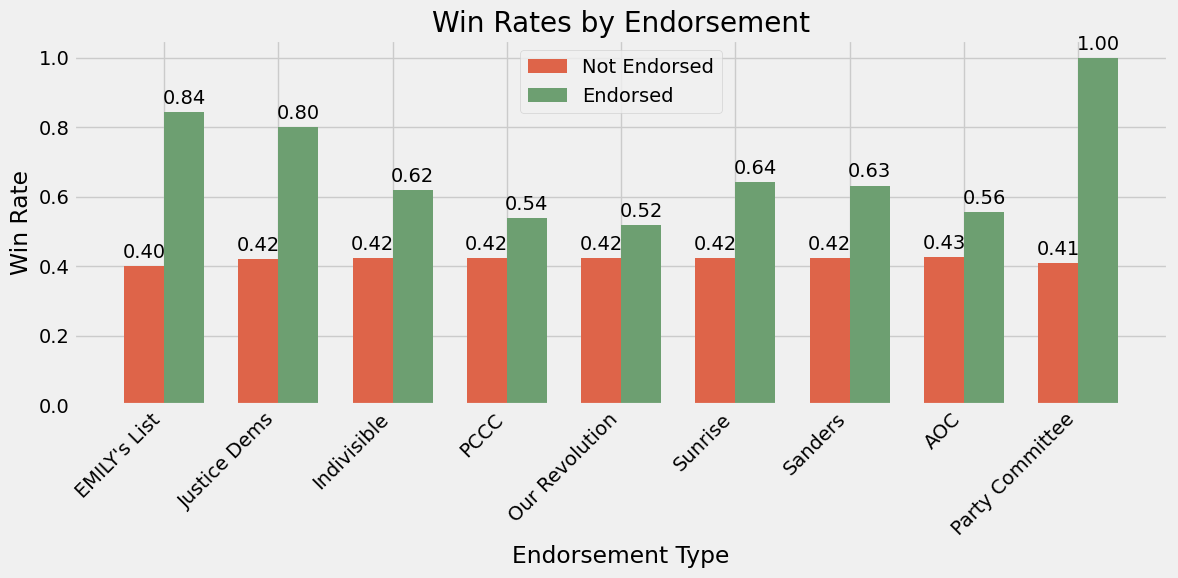

In [15]:
dem_win_rates = {endorser: d_endorsers.groupby(endorser)["Primary Outcome"].mean()
             for endorser in dem_endorsement_columns}

dem_win_rates_df = pd.DataFrame(dem_win_rates).T
dem_win_rates_df.columns = ["Not Endorsed", "Endorsed"]

x = np.arange(len(dem_win_rates_df))
width = 0.35
fig, ax = plt.subplots(figsize=(12, 6))

bar1 = ax.bar(x - width / 2, dem_win_rates_df["Not Endorsed"], width, label = "Not Endorsed", color = "#DE6449")
bar2 = ax.bar(x + width / 2, dem_win_rates_df["Endorsed"], width, label = "Endorsed", color = "#6D9F71")

ax.set_xlabel("Endorsement Type")
ax.set_ylabel("Win Rate")
ax.set_title("Win Rates by Endorsement")
ax.set_xticks(x)
ax.set_xticklabels(dem_win_rates_df.index, rotation=45, ha="right")
ax.legend()

for bar in bar1 + bar2:
    height = bar.get_height()
    ax.annotate(f"{height:.2f}",xy = (bar.get_x() + bar.get_width() / 2, height),
                xytext = (0, 3), textcoords = "offset points", ha = "center", va = "bottom")

plt.tight_layout()
plt.show()

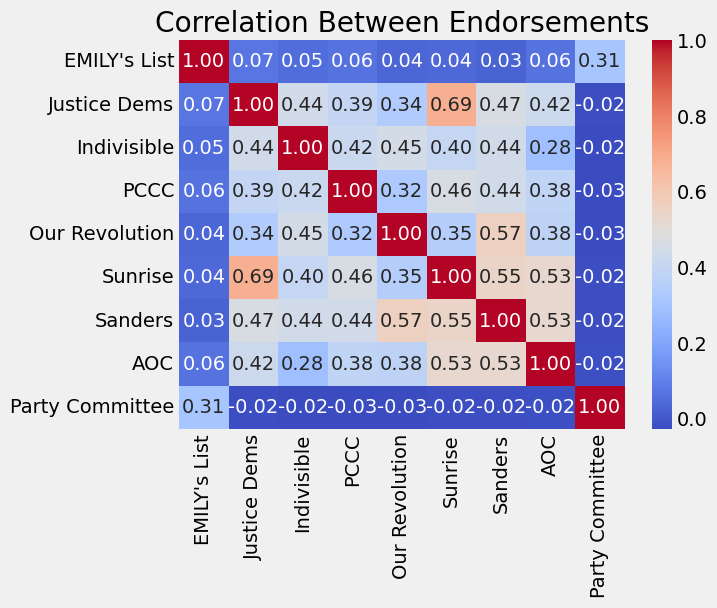

In [16]:
# create correlation matrix for Democratic candidates
dem_correlation_matrix = d_endorsers[dem_endorsement_columns].corr()

sns.heatmap(dem_correlation_matrix, annot = True, cmap = "coolwarm", fmt = ".2f")
plt.title("Correlation Between Endorsements")
plt.show()

## Republicans results

In [17]:
r_endorsers = rep[["Primary Outcome", "Trump", "Club for Growth", "E-PAC",
                  "VIEW PAC", "Maggie's List", "Winning for Women"]]
r_endorsers["Primary Outcome"] = r_endorsers["Primary Outcome"].apply(lambda x: 1 if x == "Won" else 0)
r_endorsers["Trump"] = r_endorsers["Trump"].apply(lambda x: 1 if x == "Yes" else 0)
r_endorsers["Club for Growth"] = r_endorsers["Club for Growth"].apply(lambda x: 1 if x == "Yes" else 0)
r_endorsers["E-PAC"] = r_endorsers["E-PAC"].apply(lambda x: 1 if x == "Yes" else 0)
r_endorsers["VIEW PAC"] = r_endorsers["VIEW PAC"].apply(lambda x: 1 if x == "Yes" else 0)
r_endorsers["Maggie's List"] = r_endorsers["Maggie's List"].apply(lambda x: 1 if x == "Yes" else 0)
r_endorsers["Winning for Women"] = r_endorsers["Winning for Women"].apply(lambda x: 1 if x == "Yes" else 0)

r_endorsers

,Primary Outcome,Trump,Club for Growth,E-PAC,VIEW PAC,Maggie's List,Winning for Women
0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
1594,0,0,0,0,0,0,0
1595,1,0,0,0,0,0,0
1596,1,0,0,0,0,0,0
1597,1,0,0,0,0,0,0


In [18]:
rep_endorsement_columns = ["Trump", "Club for Growth", "E-PAC", "VIEW PAC",
                           "Maggie's List", "Winning for Women"]

rep_endorsement_counts = r_endorsers.sum()
rep_endorsement_counts

,0
Primary Outcome,466
Trump,188
Club for Growth,23
E-PAC,18
VIEW PAC,58
Maggie's List,49
Winning for Women,23


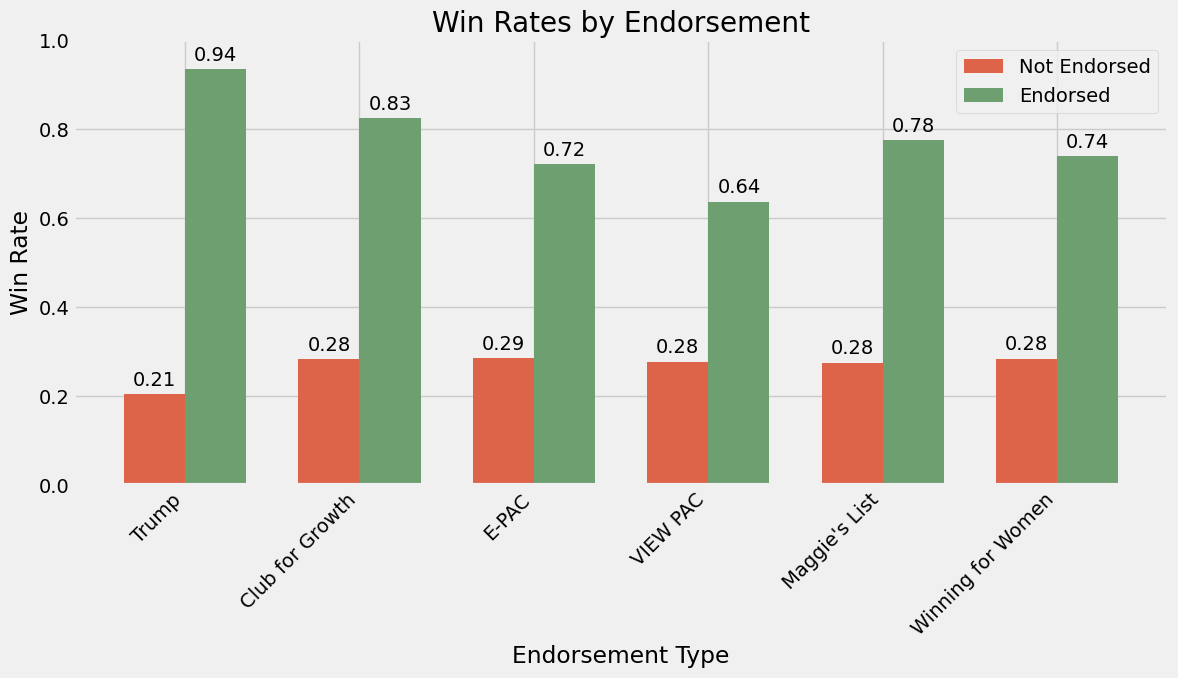

In [19]:
rep_win_rates = {endorser: r_endorsers.groupby(endorser)["Primary Outcome"].mean()
             for endorser in rep_endorsement_columns}

rep_win_rates_df = pd.DataFrame(rep_win_rates).T
rep_win_rates_df.columns = ["Not Endorsed", "Endorsed"]

x = np.arange(len(rep_win_rates_df))
width = 0.35
fig, ax = plt.subplots(figsize=(12, 7))

bar1 = ax.bar(x - width / 2, rep_win_rates_df["Not Endorsed"], width, label = "Not Endorsed", color = "#DE6449")
bar2 = ax.bar(x + width / 2, rep_win_rates_df["Endorsed"], width, label = "Endorsed", color = "#6D9F71")

ax.set_xlabel("Endorsement Type")
ax.set_ylabel("Win Rate")
ax.set_title("Win Rates by Endorsement")
ax.set_xticks(x)
ax.set_xticklabels(rep_win_rates_df.index, rotation=45, ha="right")
ax.set_ylim(0, 1)
ax.legend()

for bar in bar1 + bar2:
    height = bar.get_height()
    ax.annotate(f"{height:.2f}",xy = (bar.get_x() + bar.get_width() / 2, height),
                xytext = (0, 3), textcoords = "offset points", ha = "center", va = "bottom")

plt.tight_layout()
plt.show()

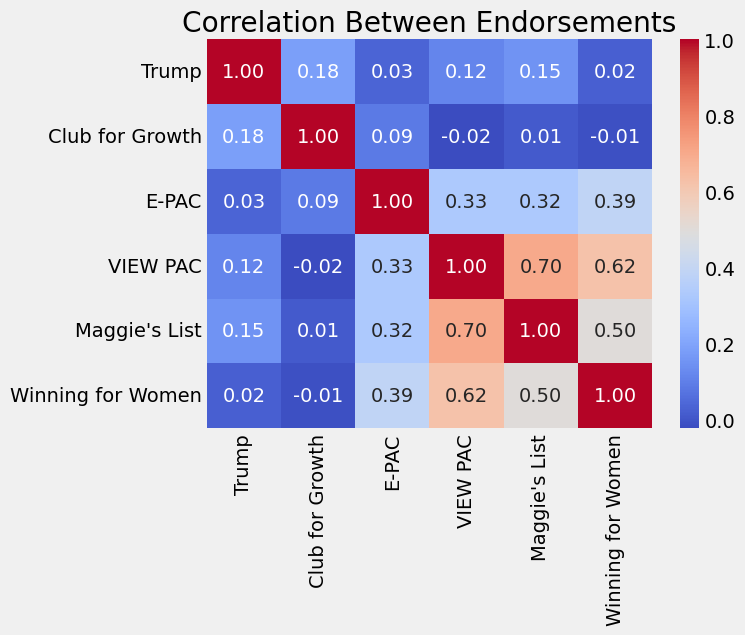

In [20]:
# create correlation matrix for Republican candidates
rep_correlation_matrix = r_endorsers[rep_endorsement_columns].corr()

sns.heatmap(rep_correlation_matrix, annot = True, cmap = "coolwarm", fmt = ".2f")
plt.title("Correlation Between Endorsements")
plt.show()

## FEC Data

In [107]:
# load FEC dataset
fec = pd.read_csv('candidate_summary_2022.csv')

In [95]:
# concatenate all candidates together
dem_rep = pd.concat([dem, rep], ignore_index=True)

In [96]:
# collect all endorsers and clean up concatenated dataframe
all_endorsements = ["EMILY's List", "Justice Dems", "Indivisible", "PCCC", "Our Revolution", 
                    "Sunrise", "Sanders", "AOC", "Party Committee", "Trump", "Club for Growth", 
                    "E-PAC", "VIEW PAC", "Maggie's List", "Winning for Women"]

def convert_endorsement(value):
    if value == "Yes" or value == "Yes (runoff only)":
        return 1
    else:
        return 0

for col in all_endorsements:
    dem_rep[col] = dem_rep[col].apply(convert_endorsement)

In [97]:
dem_rep

,Candidate,Gender,Race 1,Race 2,Race 3,Incumbent,Incumbent Challenger,State,Primary Date,Office,...,2020 Election Stance,Trump,Trump Date,Club for Growth,Renew America,E-PAC,VIEW PAC,Maggie's List,Winning for Women,ex
0,Gavin Dass,Male,White,Asian (Indian),NaN,No,No,Texas,3/1/22,Representative,...,NaN,0,NaN,0,NaN,0,0,0,0,NaN
1,Victor D. Dunn,Male,Black,NaN,NaN,No,No,Texas,3/1/22,Representative,...,NaN,0,NaN,0,NaN,0,0,0,0,NaN
2,"Jrmar ""JJ"" Jefferson",Male,Black,NaN,NaN,No,No,Texas,3/1/22,Representative,...,NaN,0,NaN,0,NaN,0,0,0,0,NaN
3,Stephen Kocen,Male,White,NaN,NaN,No,No,Texas,3/1/22,Representative,...,NaN,0,NaN,0,NaN,0,0,0,0,NaN
4,Robin Fulford,Female,White,NaN,NaN,No,No,Texas,3/1/22,Representative,...,NaN,0,NaN,0,NaN,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2671,Karen Testerman,Female,Asian (Japanese),White,NaN,No,Yes,New Hampshire,9/13/22,Governor,...,Fully denied,0,NaN,0,NaN,0,0,0,0,0.000006
2672,Allen R. Waters,Male,Black,NaN,NaN,No,No,Rhode Island,9/13/22,Representative,...,No comment,0,NaN,0,NaN,0,0,0,0,0.000001
2673,Allan W. Fung,Male,Asian (Chinese),NaN,NaN,No,No,Rhode Island,9/13/22,Representative,...,Accepted with reservations,0,NaN,0,NaN,0,0,0,0,0.870519
2674,Ashley Marie Kalus,Female,White,NaN,NaN,No,No,Rhode Island,9/13/22,Governor,...,Avoided answering,0,NaN,0,NaN,0,0,0,0,0.002020


In [100]:
def process_fec_name(name):
    name_parts = name.split(', ')
    last_name = name_parts[0].strip()
    first_name = name_parts[1].split()[0].strip() if len(name_parts) > 1 else ""
    return f"{first_name} {last_name}"

def process_demrep_name(name):
    name = re.sub(r'".*?"', '', name).strip()
    name_parts = name.split()
    first_name = name_parts[0] if len(name_parts) > 0 else ""
    last_name = name_parts[-1] if len(name_parts) > 1 else ""
    return f"{first_name} {last_name}"

fec["First_Last_Name"] = fec["Cand_Name"].apply(process_fec_name).str.lower()
dem_rep["First_Last_Name"] = dem_rep["Candidate"].apply(process_demrep_name).str.lower()

In [101]:
all_fec = pd.merge(fec, dem_rep, on='First_Last_Name', how='inner')
all_fec["Runoff Outcome"].unique()

array(['Lost', nan, 'Won'], dtype=object)

In [102]:
# clean up NaN values in merged FEC/538 dataset above 
def convert_outcome(value):
    if value == "Won":
        return 1
    else:
        return 0
    
all_fec["Runoff Outcome"] = all_fec["Runoff Outcome"].apply(convert_outcome)
all_fec["Primary Outcome"] = all_fec["Primary Outcome"].apply(convert_outcome)

In [103]:
all_fec["Primary Outcome (Including runoff)"] = all_fec["Runoff Outcome"] + all_fec["Primary Outcome"]
all_fec.head()

,Link_Image,Cand_Name,Cand_Id,Cand_Office,Cand_Office_St,Cand_Office_Dist,Cand_Party_Affiliation,Cand_Incumbent_Challenger_Open_Seat,Total_Receipt,Total_Disbursement,...,Trump,Trump Date,Club for Growth,Renew America,E-PAC,VIEW PAC,Maggie's List,Winning for Women,ex,Primary Outcome (Including runoff)
0,https://www.fec.gov/data/candidate/H2GA10281/?...,"JONES, VERNON",H2GA10281,H,GA,10.0,REP,OPEN,532520.99,532489.09,...,1,5/3/22,0,NaN,0,0,0,0,0.863079,0
1,https://www.fec.gov/data/candidate/S2OH00394/?...,"BERMAN, JOHN",S2OH00394,S,OH,0.0,REP,OPEN,0.00,0.00,...,0,NaN,0,NaN,0,0,0,0,0.004039,0
2,https://www.fec.gov/data/candidate/S2IL00168/?...,"CRUZ, ROBERT ROB",S2IL00168,S,IL,0.0,REP,CHALLENGER,162526.76,162526.76,...,0,NaN,0,NaN,0,0,0,0,0.004616,0
3,https://www.fec.gov/data/candidate/H2GA14101/?...,"LUTIN, CHARLES DAVID DOCTOR",H2GA14101,H,GA,14.0,REP,CHALLENGER,26717.28,26717.28,...,0,NaN,0,NaN,0,0,0,0,0.001421,0
4,https://www.fec.gov/data/candidate/H2WI03148/?...,"MCGRATH, DEB",H2WI03148,H,WI,3.0,DEM,OPEN,738055.79,738955.79,...,0,NaN,0,NaN,0,0,0,0,NaN,0


In [104]:
print("Win Rates by Incumbency:")
win_rates = all_fec.groupby("Incumbent")["Primary Outcome"].mean()
print(win_rates)

print("Average Contributions by Incumbency:")
contributions = all_fec.groupby("Incumbent")[["Total_Contribution", "Total_Receipt"]].mean()
print(contributions)

Win Rates by Incumbency:
Incumbent
No     0.237132
Yes    0.940199
Name: Primary Outcome, dtype: float64
Average Contributions by Incumbency:
           Total_Contribution  Total_Receipt
Incumbent                                   
No               6.319465e+05   8.009765e+05
Yes              4.270540e+06   4.708106e+06


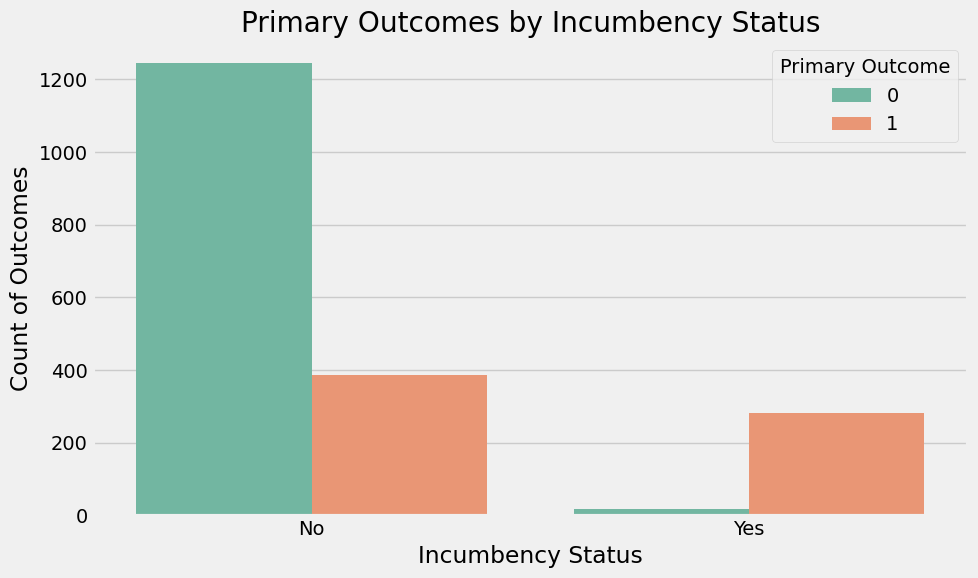

In [105]:
outcome_counts = all_fec.groupby(["Incumbent", "Primary Outcome"]).size().reset_index(name='Count')

plt.figure(figsize=(10, 6))
sns.barplot(data=outcome_counts, x="Incumbent", y="Count", hue="Primary Outcome", 
            palette="Set2")

plt.title("Primary Outcomes by Incumbency Status")
plt.xlabel("Incumbency Status")
plt.ylabel("Count of Outcomes")
plt.legend(title="Primary Outcome")
plt.tight_layout()

plt.show()

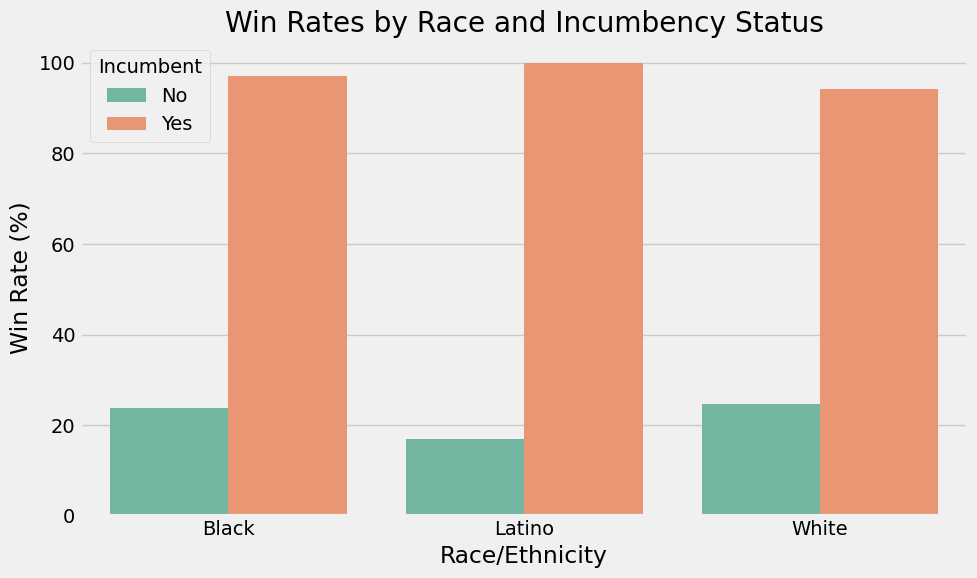

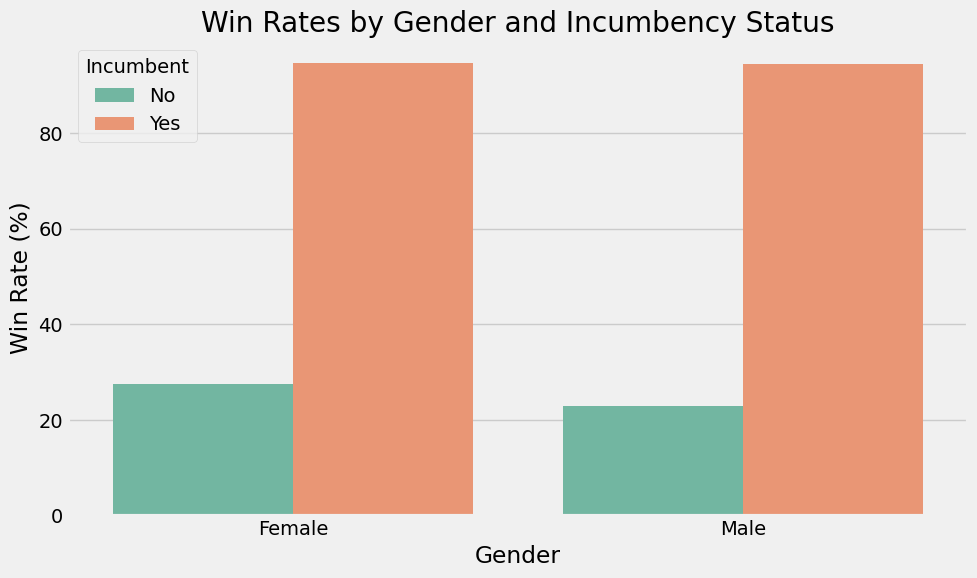

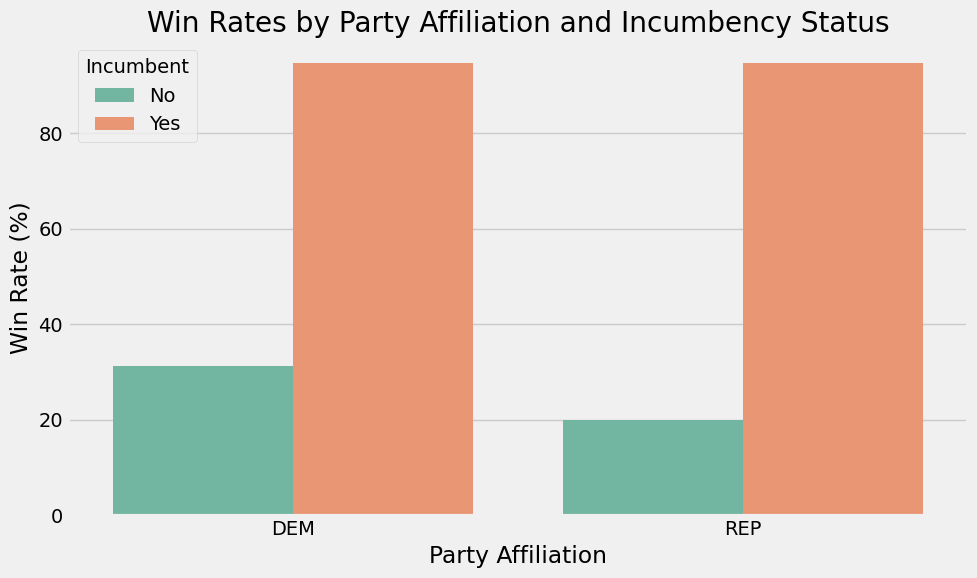

In [106]:
filtered_races = ["White", "Black", "Latino"]
filtered_genders = ["Male", "Female"]
filtered_parties = ["REP", "DEM"]

race_fec = all_fec[all_fec["Race 1"].isin(filtered_races) & 
                   all_fec["Gender"].isin(filtered_genders) & 
                   all_fec["Cand_Party_Affiliation"].isin(filtered_parties)]

race_group = race_fec.groupby(["Race 1", "Incumbent", "Primary Outcome"]).size().unstack(fill_value=0)
race_group["Total"] = race_group[0] + race_group[1]
race_group["Win Rate"] = (race_group[1] / race_group["Total"]) * 100
race_group = race_group.reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(
    data=race_group,
    x="Race 1",
    y="Win Rate",
    hue="Incumbent",
    palette="Set2"
)
plt.title("Win Rates by Race and Incumbency Status")
plt.xlabel("Race/Ethnicity")
plt.ylabel("Win Rate (%)")
plt.legend(title="Incumbent")
plt.tight_layout()
plt.show()

gender_group = race_fec.groupby(["Gender", "Incumbent", "Primary Outcome"]).size().unstack(fill_value=0)
gender_group["Total"] = gender_group[0] + gender_group[1]
gender_group["Win Rate"] = (gender_group[1] / gender_group["Total"]) * 100
gender_group = gender_group.reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(
    data=gender_group,
    x="Gender",
    y="Win Rate",
    hue="Incumbent",
    palette="Set2"
)
plt.title("Win Rates by Gender and Incumbency Status")
plt.xlabel("Gender")
plt.ylabel("Win Rate (%)")
plt.legend(title="Incumbent")
plt.tight_layout()
plt.show()

party_group = race_fec.groupby(["Cand_Party_Affiliation", "Incumbent", "Primary Outcome"]).size().unstack(fill_value=0)
party_group["Total"] = party_group[0] + party_group[1]
party_group["Win Rate"] = (party_group[1] / party_group["Total"]) * 100
party_group = party_group.reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(
    data=party_group,
    x="Cand_Party_Affiliation",
    y="Win Rate",
    hue="Incumbent",
    palette="Set2"
)
plt.title("Win Rates by Party Affiliation and Incumbency Status")
plt.xlabel("Party Affiliation")
plt.ylabel("Win Rate (%)")
plt.legend(title="Incumbent")
plt.tight_layout()
plt.show()


# 3. Multiple Hypotheses

In [21]:
reps = pd.read_csv('rep_candidates.csv')

In [22]:
reps['Primary %'] = reps['Primary %'].apply(lambda x: int(x.replace('%', '')) / 100 if type(x) == str else 0)
reps['Primary Outcome'] = reps['Primary Outcome'].apply(lambda x: 0 if x == 'Lost' else 1)

Here we calculate the expected value for win rate based on the number of candidates in each race. The overall expected win rate is the average inverse number of candidates across all races, which means that each candidate is expected to get an equal proportion of votes.

In [23]:
counts = reps[['State', 'Office', 'District', 'Candidate']].groupby(['State', 'Office', 'District']).count()['Candidate'].value_counts().reset_index()
counts['averages'] = counts.reset_index().apply(lambda row: 1 / row['Candidate'], axis=1)

display(counts)

expectations = []

for x in counts[1:].iterrows():
    num = x[1]['count']
    data = np.random.normal(loc=x[1]['averages'], scale=0.1, size=int(num))
    expectations.append(data)

all_ex = []

for i in range(len(expectations)):
    all_ex.extend(expectations[i])

EV = np.mean(all_ex)
EV

,Candidate,count,averages
0,1,144,1.000000
1,2,94,0.500000
2,3,65,0.333333
3,5,37,0.200000
4,4,35,0.250000
5,7,16,0.142857
6,6,14,0.166667
7,8,8,0.125000
8,9,4,0.111111
9,10,3,0.100000


0.3274696021316444

In [30]:
def avg_difference_in_means(binary_col, numerical_col):
    # Compute the p-value for a test of the following hypothesis test
    # Null: There is no difference in the average value of numerical_col betweeen the two groups specified in binary_col
    # Alt: The average value of numerical_col is different for the two groups specified in binary_col

    def difference_of_means(binary_col, numerical_col, df):
        mean_by_binary = df.groupby(binary_col)[numerical_col].mean().reset_index()
        avg_diff = mean_by_binary.loc[mean_by_binary[binary_col] == "Yes"]["Primary %"] - EV
        return avg_diff

    def one_simulated_difference_of_means():
        # Creating a copy of adult, with ony the binary and numerical columns, then assigning random binary lables
        reps["Shuffled Binary"] = reps[binary_col].sample(n = len(reps)).values
        return difference_of_means("Shuffled Binary", numerical_col, reps)

    observed_difference = difference_of_means(binary_col, numerical_col, reps).iloc[0]
    print(observed_difference)

    differences = []
    repetitions = 25000

    for i in np.arange(repetitions):
        diff = one_simulated_difference_of_means()
        differences = np.append(differences, diff)

    empirical_p = np.count_nonzero(differences >= observed_difference) / repetitions
    return empirical_p


In [25]:
p_values = {"Trump": avg_difference_in_means("Trump", "Primary %"),
           "Club for Growth": avg_difference_in_means("Club for Growth", "Primary %"),
           "E-PAC": avg_difference_in_means("E-PAC", "Primary %"),
           "VIEW PAC": avg_difference_in_means("VIEW PAC", "Primary %"),
           "Maggie's List": avg_difference_in_means("Maggie's List", "Primary %"),
           "Winning for Women": avg_difference_in_means("Winning for Women", "Primary %")}

all_p_values = pd.DataFrame.from_dict(p_values, orient = "index", columns = ["p_value"])
all_p_values

0.4297644404215472
0.26600865873792084
0.14753039786835564
0.2197717771787005
0.29395896929692705
0.26035648482487733


,p_value
Trump,0.00000
Club for Growth,0.00004
E-PAC,0.01708
VIEW PAC,0.00000
Maggie's List,0.00000
Winning for Women,0.00000


Below we use naive thresholding and Bonferroni correction to see which endorsers have sufficient $p$-values.

In [26]:
# Naive
np.array(all_p_values["p_value"]) <= 0.05

array([ True,  True,  True,  True,  True,  True])

In [27]:
# Bonferroni Correction
np.array(all_p_values["p_value"]) <= 0.01/6

array([ True,  True, False,  True,  True,  True])

All have sufficiently low $p$-values for both types of thresholding, except E-PAC, which does not pass under Bonferroni correction.

In [44]:
def calculate_statistical_power(mean1, mean2, std, n1, n2):
    #mean1, n1 refers to base population
    # Calculate effect size (Cohen's d)
    effect_size = abs(mean2 - mean1) / std
    df = n1 + n2 - 2
    ncp = effect_size * np.sqrt(n1 * n2 / (n1 + n2))
    t_crit = stats.t.ppf(1 - 0.05/2, df)

    power = 1 - stats.nct.cdf(t_crit, df, ncp) + stats.nct.cdf(-t_crit, df, ncp)

    return power

r_endorsements = ["Trump",  "Club for Growth",
           "E-PAC",
           "VIEW PAC",
           "Maggie's List",
           "Winning for Women"]

for e in r_endorsements:
    power = calculate_statistical_power(
        mean1 = np.mean(reps['Primary %']),
        mean2 = np.mean(reps[reps[e] == 'Yes']['Primary %']),
        std= np.std(reps['Primary %']),
        n1= reps.shape[0] - reps[reps[e] == 'Yes'].shape[0],
        n2= reps[reps[e] == 'Yes'].shape[0]
    )
    print(e, "Power:", power)

Trump Power: 1.0
Club for Growth Power: 0.9904238111532954
E-PAC Power: 0.609986852640071
VIEW PAC Power: 0.9998956271340238
Maggie's List Power: 0.9999994538105428
Winning for Women Power: 0.9880227006173068


In [45]:
for e in r_endorsements:
    print(f'{e} num wins: {reps[reps[e] == "Yes"].shape[0]}')

Trump num wins: 188
Club for Growth num wins: 23
E-PAC num wins: 18
VIEW PAC num wins: 58
Maggie's List num wins: 49
Winning for Women num wins: 23


# 4. Causal Inference

In [33]:
r_endorsers = rep[["Trump", "Club for Growth", "E-PAC",
                  "VIEW PAC", "Maggie's List", "Winning for Women"]]
r_endorsers["Trump"] = r_endorsers["Trump"].apply(lambda x: 1 if x == "Yes" else 0)
r_endorsers["Club for Growth"] = r_endorsers["Club for Growth"].apply(lambda x: 1 if x == "Yes" else 0)
r_endorsers["E-PAC"] = r_endorsers["E-PAC"].apply(lambda x: 1 if x == "Yes" else 0)
r_endorsers["VIEW PAC"] = r_endorsers["VIEW PAC"].apply(lambda x: 1 if x == "Yes" else 0)
r_endorsers["Maggie's List"] = r_endorsers["Maggie's List"].apply(lambda x: 1 if x == "Yes" else 0)
r_endorsers["Winning for Women"] = r_endorsers["Winning for Women"].apply(lambda x: 1 if x == "Yes" else 0)

In [52]:
r_endorsers["endorsements"] = r_endorsers.sum(axis = 1, skipna=True)
r_endorsers["Primary Outcome"] = rep["Primary Outcome"].apply(lambda x: 1 if x == "Won" else 0)
r_endorsers.head()

,Trump,Club for Growth,E-PAC,VIEW PAC,Maggie's List,Winning for Women,endorsements,Primary Outcome,Incumbent
0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,7,1,0
3,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,14,1,1


In [35]:
r_endorsers["Incumbent"] = rep["Incumbent"].apply(lambda x: 1 if x == "Yes" else 0)

In [36]:
dem["Party"] = "DEM"
rep["Party"] = "REP"

dem_rep = pd.concat([dem, rep], ignore_index=True)

In [39]:
def process_fec_name(name):
    name_parts = name.split(', ')
    last_name = name_parts[0].strip()
    first_name = name_parts[1].split()[0].strip() if len(name_parts) > 1 else ""
    return f"{first_name} {last_name}"

fec["First_Last_Name"] = fec["Cand_Name"].apply(process_fec_name).str.lower()

def process_demrep_name(name):
    name = re.sub(r'".*?"', '', name).strip()
    name_parts = name.split()
    first_name = name_parts[0] if len(name_parts) > 0 else ""
    last_name = name_parts[-1] if len(name_parts) > 1 else ""
    return f"{first_name} {last_name}"

dem_rep["First_Last_Name"] = dem_rep["Candidate"].apply(process_demrep_name).str.lower()

In [48]:
all_fec = pd.merge(fec, dem_rep, on='First_Last_Name', how='inner')
all_endorsements = r_endorsements + dem_endorsement_columns
endorsers = all_fec[all_endorsements]
endorsers.head()

,Trump,Club for Growth,E-PAC,VIEW PAC,Maggie's List,Winning for Women,EMILY's List,Justice Dems,Indivisible,PCCC,Our Revolution,Sunrise,Sanders,AOC,Party Committee
0,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,No,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
all_endorsements = r_endorsements + dem_endorsement_columns
endorsers = all_fec[all_endorsements]
for e in all_endorsements:
    endorsers[e] = endorsers[e].apply(lambda x: 1 if x == "Yes" else 0)
endorsers["endorsements"] = endorsers.sum(axis = 1, skipna=True)
endorsers["Primary Outcome"] = all_fec["Primary Outcome"].apply(lambda x: 1 if x == "Won" else 0)
endorsers["Incumbent"] = all_fec["Incumbent"].apply(lambda x: 1 if x == "Yes" else 0)
endorsers["Party"] = all_fec["Party"].apply(lambda x: 1 if x == "REP" else 0)
endorsers["Total Contribution"] = all_fec["Total_Contribution"]
endorsers.head()

,Trump,Club for Growth,E-PAC,VIEW PAC,Maggie's List,Winning for Women,EMILY's List,Justice Dems,Indivisible,PCCC,Our Revolution,Sunrise,Sanders,AOC,Party Committee,endorsements,Primary Outcome,Incumbent,Party,Total Contribution
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,532307.39
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.00
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,149729.76
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,26717.28
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,717875.31


In [56]:
# fits an OLS model from data
def fit_OLS_model(df, target_variable, explanatory_variables, intercept = False):
    target = df[target_variable]
    inputs = df[explanatory_variables]
    if intercept:
        inputs = sm.add_constant(inputs)

    fitted_model = sm.OLS(target, inputs).fit()
    return(fitted_model)

# calculate MSE
def mean_squared_error(true_vals, predicted_vals):
    return np.mean((true_vals - predicted_vals) ** 2)

In [57]:
linear_model = fit_OLS_model(r_endorsers, "Primary Outcome", ["Incumbent","endorsements"])
print(linear_model.summary())

                                 OLS Regression Results                                
Dep. Variable:        Primary Outcome   R-squared (uncentered):                   0.694
Model:                            OLS   Adj. R-squared (uncentered):              0.694
Method:                 Least Squares   F-statistic:                              1815.
Date:                Tue, 17 Dec 2024   Prob (F-statistic):                        0.00
Time:                        04:13:17   Log-Likelihood:                         -335.24
No. Observations:                1599   AIC:                                      674.5
Df Residuals:                    1597   BIC:                                      685.2
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [58]:
linear_model = fit_OLS_model(r_endorsers, "Primary Outcome", "Incumbent")
print(linear_model.summary())

                                 OLS Regression Results                                
Dep. Variable:        Primary Outcome   R-squared (uncentered):                   0.409
Model:                            OLS   Adj. R-squared (uncentered):              0.409
Method:                 Least Squares   F-statistic:                              1108.
Date:                Tue, 17 Dec 2024   Prob (F-statistic):                   5.68e-185
Time:                        04:13:18   Log-Likelihood:                         -862.11
No. Observations:                1599   AIC:                                      1726.
Df Residuals:                    1598   BIC:                                      1732.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [59]:
pd.get_dummies(rep["Incumbent"], dtype= 'float')['Yes'].value_counts()

,count
Yes,
0.0,1383
1.0,216


In [60]:
df = pd.DataFrame(all_fec["Race 1"].unique(), columns=['Detailed_Race'])

# Extract the broader race
df['Broader_Race'] = df['Detailed_Race'].str.extract(r'(\b\w+\b)')

# Clean up any extra spaces or inconsistencies
df['Broader_Race'] = df['Broader_Race'].str.strip()
endorsers["Broader_Race"] = rep["Race 1"].str.extract(r'^([\w\s]+?)(?:\s*\(|$)')
endorsers['Broader_Race']= endorsers['Broader_Race'].str.strip()
endorsers['Broader_Race'].value_counts()

df_dummy = pd.get_dummies(data = endorsers,columns=["Broader_Race"],dtype=int)
dummy_var = df_dummy.columns.difference(endorsers.columns).tolist()
df_dummy.head()

,Trump,Club for Growth,E-PAC,VIEW PAC,Maggie's List,Winning for Women,EMILY's List,Justice Dems,Indivisible,PCCC,...,Party,Total Contribution,Broader_Race_Asian,Broader_Race_Black,Broader_Race_Latino,Broader_Race_Middle Eastern,Broader_Race_Native American,Broader_Race_Pacific Islander,Broader_Race_Unknown,Broader_Race_White
0,1,0,0,0,0,0,0,0,0,0,...,1,532307.39,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0.00,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,1,149729.76,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,1,26717.28,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,717875.31,0,0,0,0,0,0,0,1


In [61]:
from sklearn.linear_model import LogisticRegression as LR
Z = df_dummy["Incumbent"]
Y = df_dummy["Primary Outcome"]
col = ["Party"] + dummy_var
X = df_dummy[col]
lr = LR(penalty= None, max_iter=200)
model = lr.fit(X,Z)
def estimate_treatment_effect(model, treatment, outcome, features):
    """ estimate treatment accounting for the propensity"""
    predicted = model.predict_proba(X)
    ehat = np.array([i[1] for i in predicted])
    return np.sum(treatment*outcome/ehat - ((1-treatment)*outcome)/(1-ehat))/len(treatment)
ate = estimate_treatment_effect(model, Z, Y, X)
ate

0.7018682553816167